In [ ]:
import pandas as pd
df = pd.read_csv("/content/OnlineRetail.csv", sep = "," , encoding= "ISO-8859-1", header = 0)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(12462, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12462 entries, 0 to 12461
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    12462 non-null  object 
 1   StockCode    12462 non-null  object 
 2   Description  12417 non-null  object 
 3   Quantity     12461 non-null  float64
 4   InvoiceDate  12461 non-null  object 
 5   UnitPrice    12461 non-null  float64
 6   CustomerID   8956 non-null   float64
 7   Country      12461 non-null  object 
dtypes: float64(3), object(5)
memory usage: 779.0+ KB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,12461.000000,12461.000000,8956.000000
mean,7.477249,3.973280,15598.129299
std,93.885564,17.253932,1748.194062
min,-9360.000000,0.000000,12395.000000
25%,1.000000,1.250000,14307.000000
50%,2.000000,2.510000,15646.000000
75%,6.000000,4.210000,17211.000000
max,2880.000000,940.870000,18239.000000


In [ ]:
df_null = round(100*(df.isnull().sum())/len(df),2)

In [ ]:
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.36
Quantity        0.01
InvoiceDate     0.01
UnitPrice       0.01
CustomerID     28.13
Country         0.01
dtype: float64

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(8956, 8)

In [ ]:
df['CustomerID'] = df['CustomerID'].astype(str)

In [ ]:
df['Amount'] = df['Quantity']*df['UnitPrice']
rfm = df.groupby('CustomerID')['Amount'].sum()
rfm = rfm.reset_index()
rfm.head()

,CustomerID,Amount
0,12395.0,346.10
1,12427.0,303.50
2,12431.0,358.25
3,12433.0,1919.14
4,12471.0,-17.00


In [ ]:
rff = df.groupby('CustomerID')['InvoiceNo'].count()
rff = rff.reset_index()
rff.columns = ['CustomerID','Frequency']
rff.head()

,CustomerID,Frequency
0,12395.0,12
1,12427.0,10
2,12431.0,14
3,12433.0,73
4,12471.0,1


In [ ]:
rft = pd.merge(rfm, rff, on = 'CustomerID', how = 'inner')
rft.head()

,CustomerID,Amount,Frequency
0,12395.0,346.10,12
1,12427.0,303.50,10
2,12431.0,358.25,14
3,12433.0,1919.14,73
4,12471.0,-17.00,1


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d/%m/%Y %H:%M')

In [ ]:
maxDate = max(df['InvoiceDate'])
maxDate

Timestamp('2010-06-12 13:13:00')

In [ ]:
df['Diff'] = maxDate - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,151 days 04:47:00
1,536365,71053,WHITE METAL LANTERN,6.0,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,151 days 04:47:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,151 days 04:47:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,151 days 04:47:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,151 days 04:47:00


In [ ]:
rfp = df.groupby('CustomerID')['Diff'].min()
rfp = rfp.reset_index()
rfp.head()

,CustomerID,Diff
0,12395.0,91 days 20:38:00
1,12427.0,92 days 02:29:00
2,12431.0,151 days 03:10:00
3,12433.0,150 days 23:49:00
4,12471.0,120 days 02:36:00


In [ ]:
rfp['Diff'] =rfp['Diff'].dt.days
rfp.head()

,CustomerID,Diff
0,12395.0,91
1,12427.0,92
2,12431.0,151
3,12433.0,150
4,12471.0,120


In [ ]:
rft['CustomerID']= rft['CustomerID'].astype('float64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  371 non-null    float64
 1   Diff        371 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 5.9 KB


In [ ]:
rft = pd.merge(rft, rfp, on = 'CustomerID', how = 'inner')
rft.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rft.head()

,CustomerID,Amount,Frequency,Recency
0,12395.0,346.10,12,91
1,12427.0,303.50,10,92
2,12431.0,358.25,14,151
3,12433.0,1919.14,73,150
4,12471.0,-17.00,1,120


Text(0.5, 0, 'Attributes')

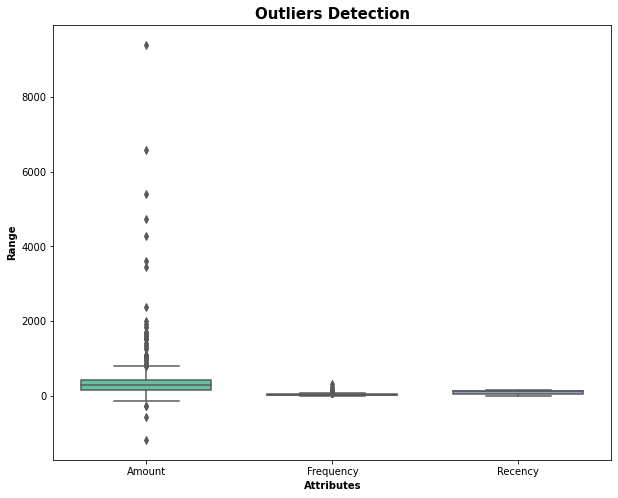

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
attributes = ['Amount', 'Frequency', 'Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rft[attributes], orient ="v", palette= "Set2", whis = 1.5, saturation= 1, width  = 0.7)
plt.title("Outliers Detection", fontsize = 15, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight= 'bold')

In [ ]:
Q1 = rft.Amount.quantile(0.05)
Q3 = rft.Amount.quantile(0.95)
IQR = Q3 - Q1
rft = rft[(rft.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

Q1 = rft.Recency.quantile(0.05)
Q3 = rft.Recency.quantile(0.95)
IQR = Q3 - Q1
rft = rft[(rft.Recency >= Q1 - 1.5*IQR) & (rft.Recency <= Q3 + 1.5 * IQR)]


Q1 = rft.Frequency.quantile(0.05)
Q3 = rft.Frequency.quantile(0.95)
IQR = Q3 - Q1
rft = rft[(rft.Frequency >= Q1 - 1.5*IQR) & (rft.Frequency <= Q3 + 1.5 * IQR)]

In [ ]:
rft_df = rft[['Amount', 'Frequency', 'Recency']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rft_df_scaled = scaler.fit_transform(rft_df)
rft_df_scaled.shape

(365, 3)

In [ ]:
rft_df_scaled = pd.DataFrame(rft_df_scaled)
rft_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rft_df_scaled.head()

,Amount,Frequency,Recency
0,-0.043768,-0.441013,0.077025
1,-0.139687,-0.523540,0.095546
2,-0.016411,-0.358485,1.188257
3,3.498136,2.076072,1.169736
4,-0.861335,-0.894913,0.614120


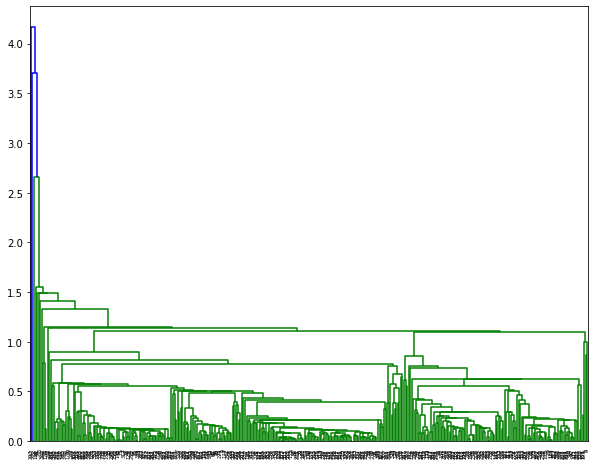

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
merg = linkage(rft_df_scaled, method = "single", metric = "euclidean")
dendrogram(merg)
plt.show()

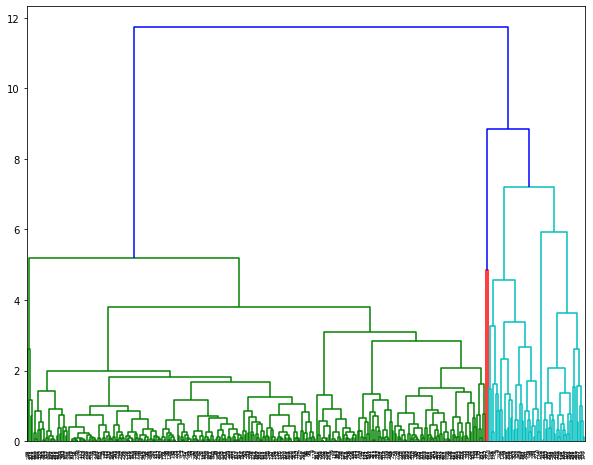

In [ ]:
merg = linkage(rft_df_scaled, method = "complete", metric = "euclidean")
dendrogram(merg)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import cut_tree
clus_lab = cut_tree(merg, n_clusters = 2).reshape(-1,)
clus_lab

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
rft['Cluster_Labels'] = clus_lab
rft.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Labels
0,12395.0,346.10,12,91,0
1,12427.0,303.50,10,92,0
2,12431.0,358.25,14,151,0
3,12433.0,1919.14,73,150,1
4,12471.0,-17.00,1,120,0
